In [152]:
#Importing packages
import random 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Patient Record list to store the dictionaries of patient information
patient_record = []

In [19]:
#Function for Enter Patient Information
def enter_patient_info():
    print("Enter Patient Information:")
    date_of_service = input("Date of Service (MM-DD-YYYY): ")
    patient_id = input("Patient ID#: ")
    name = input("Name: ").upper()
    sex = input("Sex (M/F): ").upper()
    age = int(input("Age: "))
    race = input("Race/Ethnicity: ").upper()
    prev_opioid_type = input("Previous Opioid Use Type: ").upper()
    duration_previous_opioid_use = input("Duration of Previous Opioid Use (years): ")
    methadone_dose_mg = int(input("Methadone Dose (mg): "))
    
    #Adding inputs to dictionary
    patient_info = {
        "patient_id" : patient_id,
        "name" : name,
        "sex" : sex,
        "age" : age,
        "race" : race,
        "prev_opioid_type" : prev_opioid_type,
        "duration_previous_opioid_use" : duration_previous_opioid_use,
        "date_of_service" : date_of_service,
        "methadone_dose_mg" : methadone_dose_mg
    }
    patient_record.append(patient_info)
    print("Patient {} information is added/updated successfully.".format(name))  #need to put before return in order to print
    return
    

In [20]:
#Function to append patient's methadone dose and date of service
def update_methadone_dose():

    #asks user for input 
    patient_id = input("Enter Patient ID: ")
    new_date = input("Enter Date of Service (MM-DD-YYYY): ")
    new_dose = input("Enter Methadone Dose (mg): ")
    
    #makes sure dose is written as an integer
    try:
        new_dose = int(new_dose)
    except ValueError:
        print("Invalid dose entered. Please enter a numeric value.")
        return
    
    #finds patient record
    patient_found = False
    for record in patient_record:
        if record["patient_id"] == patient_id:
            patient_found = True
            
            #'date of service' and 'methadone dose' are lists
            if not isinstance(record["date_of_service"], list):
                record["date_of_service"] = [record["date_of_service"]]
            if not isinstance(record["methadone_dose_mg"], list):
                record["methadone_dose_mg"] = [record["methadone_dose_mg"]]
            
            #to append new date and dose
            record["date_of_service"].append(new_date)
            record["methadone_dose_mg"].append(new_dose)
            print(f"Patient ID {patient_id} updated successfully.")
            break
    
    if not patient_found:
        print(f"Patient ID {patient_id} not found.")


In [21]:
#Look up patient record
def lookup():
    patient_id = input("Enter Patient ID: ")
    patient_found = False
    for record in patient_record: 
        if record ["patient_id"] == patient_id:
            print(record)
            patient_found = True
            break
    if not patient_found: 
        print("Patient not found.")

In [22]:
#### Function for the input prompt/welcome screen
def intro_prompt():
    while True:
        print("Welcome!")
        print("1. Enter Patient Information")
        print("2. Update Patient's Methadone Dose")
        print("3. Look Up Patient Information")
        print("4. Exit")

        choice = input("Please choose an option: ")

        if choice == "1":
            enter_patient_info()
        elif choice == "2":
            update_methadone_dose()
        elif choice == "3":
            lookup()
        elif choice == "4":
            print("Goodbye.")
            break
        else:
            print("Please enter a valid option.")
            break
intro_prompt()

Welcome!
1. Enter Patient Information
2. Update Patient's Methadone Dose
3. Look Up Patient Information
4. Exit


Please choose an option:  4


Goodbye.


In [23]:
#view patient record list
patient_record

[]

In [3]:
#Turning Patient Record List to DataFrame

df = pd.DataFrame(patient_record)
df

""


In [4]:
#export and save dataframe without index column
df.to_csv('draft_dataset1.csv', index=False)

In [8]:
#import data from .csv file
df = pd.read_csv('draft_dataset1.csv')
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg,total_days_attended,dose_category,age_group,retention rate
0,1,patient,f,56,black,oxycodone,6,11/1/2024,75.0,75.0,24,Moderate Dose (50-80mg),50+,80.0
1,1,patient,f,56,black,oxycodone,6,11/2/2024,75.0,75.0,24,Moderate Dose (50-80mg),50+,80.0
2,1,patient,f,56,black,oxycodone,6,11/3/2024,75.0,75.0,24,Moderate Dose (50-80mg),50+,80.0
3,1,patient,f,56,black,oxycodone,6,11/4/2024,75.0,75.0,24,Moderate Dose (50-80mg),50+,80.0
4,1,patient,f,56,black,oxycodone,6,11/5/2024,75.0,75.0,24,Moderate Dose (50-80mg),50+,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11/26/2024,120.0,120.0,30,High Dose (>80mg),50+,100.0
1785,110,patient,m,46,white,heroin,13,11/27/2024,120.0,120.0,30,High Dose (>80mg),50+,100.0
1786,110,patient,m,46,white,heroin,13,11/28/2024,120.0,120.0,30,High Dose (>80mg),50+,100.0
1787,110,patient,m,46,white,heroin,13,11/29/2024,120.0,120.0,30,High Dose (>80mg),50+,100.0


In [9]:
#view first few rows of df
df.head()

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg,total_days_attended,dose_category,age_group,retention rate
0,1,patient,f,56,black,oxycodone,6,11/1/2024,75.0,75.0,24,Moderate Dose (50-80mg),50+,80.0
1,1,patient,f,56,black,oxycodone,6,11/2/2024,75.0,75.0,24,Moderate Dose (50-80mg),50+,80.0
2,1,patient,f,56,black,oxycodone,6,11/3/2024,75.0,75.0,24,Moderate Dose (50-80mg),50+,80.0
3,1,patient,f,56,black,oxycodone,6,11/4/2024,75.0,75.0,24,Moderate Dose (50-80mg),50+,80.0
4,1,patient,f,56,black,oxycodone,6,11/5/2024,75.0,75.0,24,Moderate Dose (50-80mg),50+,80.0


In [10]:
#view last few rows of df
df.tail()

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg,total_days_attended,dose_category,age_group,retention rate
1784,110,patient,m,46,white,heroin,13,11/26/2024,120.0,120.0,30,High Dose (>80mg),50+,100.0
1785,110,patient,m,46,white,heroin,13,11/27/2024,120.0,120.0,30,High Dose (>80mg),50+,100.0
1786,110,patient,m,46,white,heroin,13,11/28/2024,120.0,120.0,30,High Dose (>80mg),50+,100.0
1787,110,patient,m,46,white,heroin,13,11/29/2024,120.0,120.0,30,High Dose (>80mg),50+,100.0
1788,110,patient,m,46,white,heroin,13,11/30/2024,120.0,120.0,30,High Dose (>80mg),50+,100.0


In [28]:
#print number of rows and columns in dataframe
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 0 rows and 0 columns.


In [11]:
#view summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    1789 non-null   int64  
 1   name                          1789 non-null   object 
 2   sex                           1789 non-null   object 
 3   age                           1789 non-null   int64  
 4   race                          1789 non-null   object 
 5   previous_opioid_use           1789 non-null   object 
 6   duration_previous_opioid_use  1789 non-null   int64  
 7   date_of_service               1789 non-null   object 
 8   methadone_dose_mg             1789 non-null   float64
 9   average_methadone_dose_mg     1789 non-null   float64
 10  total_days_attended           1789 non-null   int64  
 11  dose_category                 1789 non-null   object 
 12  age_group                     1789 non-null   object 
 13  ret

In [12]:
#descriptive statistics to quickly analyze data, 
#T shows that we are transposing index & columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,1789.0,53.190050,34.947623,1.000000,23.000000,46.000000,86.0,110.0
age,1789.0,43.248183,13.626157,18.000000,33.000000,45.000000,55.0,65.0
duration_previous_opioid_use,1789.0,5.067636,3.024584,1.000000,3.000000,5.000000,6.0,13.0
methadone_dose_mg,1789.0,63.223030,28.910637,20.000000,37.000000,60.000000,100.0,120.0
average_methadone_dose_mg,1789.0,63.223030,28.906897,20.000000,37.000000,60.000000,100.0,120.0
total_days_attended,1789.0,20.997764,8.630884,5.000000,13.000000,22.000000,30.0,30.0
retention rate,1789.0,69.992547,28.769615,16.666667,43.333333,73.333333,100.0,100.0


In [13]:
#format float to 2 decimal places for better readability
pd.set_option("display.float_format", "{:.2f}".format) 

df.describe()

,patient_id,age,duration_previous_opioid_use,methadone_dose_mg,average_methadone_dose_mg,total_days_attended,retention rate
count,1789.00,1789.00,1789.00,1789.00,1789.00,1789.00,1789.00
mean,53.19,43.25,5.07,63.22,63.22,21.00,69.99
std,34.95,13.63,3.02,28.91,28.91,8.63,28.77
min,1.00,18.00,1.00,20.00,20.00,5.00,16.67
25%,23.00,33.00,3.00,37.00,37.00,13.00,43.33
50%,46.00,45.00,5.00,60.00,60.00,22.00,73.33
75%,86.00,55.00,6.00,100.00,100.00,30.00,100.00
max,110.00,65.00,13.00,120.00,120.00,30.00,100.00


In [14]:
#create a new dataframe that shows mean methadone dose per patient
average_dose_per_patient = pd.DataFrame([
    {'patient_id': patient_id, 'average_methadone_dose_mg': group['methadone_dose_mg'].mean()}
    for patient_id, group in df.groupby('patient_id')
])

average_dose_per_patient

#merge average_methadone_dose_mg column to the original dataframe
df = df.copy()
df = df.merge(average_dose_per_patient, on='patient_id', how='left')
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg_x,total_days_attended,dose_category,age_group,retention rate,average_methadone_dose_mg_y
0,1,patient,f,56,black,oxycodone,6,11/1/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00
1,1,patient,f,56,black,oxycodone,6,11/2/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00
2,1,patient,f,56,black,oxycodone,6,11/3/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00
3,1,patient,f,56,black,oxycodone,6,11/4/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00
4,1,patient,f,56,black,oxycodone,6,11/5/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11/26/2024,120.00,120.00,30,High Dose (>80mg),50+,100.00,120.00
1785,110,patient,m,46,white,heroin,13,11/27/2024,120.00,120.00,30,High Dose (>80mg),50+,100.00,120.00
1786,110,patient,m,46,white,heroin,13,11/28/2024,120.00,120.00,30,High Dose (>80mg),50+,100.00,120.00
1787,110,patient,m,46,white,heroin,13,11/29/2024,120.00,120.00,30,High Dose (>80mg),50+,100.00,120.00


In [15]:
#create a new dataframe to see total # of days each patient attended clinic (out of 30 days) 
#.nunique() ensures removal of duplicates
total_days_attended = pd.DataFrame(df.groupby('patient_id')['date_of_service'].nunique())

#change column name from date_of_service to total_days_attended
total_days_attended.columns = ['total_days_attended'] 
total_days_attended

# Merge the total_days_attended DataFrame with the original DataFrame
df = df.merge(total_days_attended, on='patient_id', how='left')
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg_x,total_days_attended_x,dose_category,age_group,retention rate,average_methadone_dose_mg_y,total_days_attended_y
0,1,patient,f,56,black,oxycodone,6,11/1/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00,24
1,1,patient,f,56,black,oxycodone,6,11/2/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00,24
2,1,patient,f,56,black,oxycodone,6,11/3/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00,24
3,1,patient,f,56,black,oxycodone,6,11/4/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00,24
4,1,patient,f,56,black,oxycodone,6,11/5/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11/26/2024,120.00,120.00,30,High Dose (>80mg),50+,100.00,120.00,30
1785,110,patient,m,46,white,heroin,13,11/27/2024,120.00,120.00,30,High Dose (>80mg),50+,100.00,120.00,30
1786,110,patient,m,46,white,heroin,13,11/28/2024,120.00,120.00,30,High Dose (>80mg),50+,100.00,120.00,30
1787,110,patient,m,46,white,heroin,13,11/29/2024,120.00,120.00,30,High Dose (>80mg),50+,100.00,120.00,30


In [16]:
#function to categorize age groups (<25, 25-34, 35-49, 50+)
def age_group(age):
    if age < 25:
        return '<25'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 49:
        return '35-49'
    else:
        return '50+'

#create a new column called 'age_group'
df['age_group'] = df['age'].apply(age_group)

#updated dataframe
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg_x,total_days_attended_x,dose_category,age_group,retention rate,average_methadone_dose_mg_y,total_days_attended_y
0,1,patient,f,56,black,oxycodone,6,11/1/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00,24
1,1,patient,f,56,black,oxycodone,6,11/2/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00,24
2,1,patient,f,56,black,oxycodone,6,11/3/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00,24
3,1,patient,f,56,black,oxycodone,6,11/4/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00,24
4,1,patient,f,56,black,oxycodone,6,11/5/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11/26/2024,120.00,120.00,30,High Dose (>80mg),35-49,100.00,120.00,30
1785,110,patient,m,46,white,heroin,13,11/27/2024,120.00,120.00,30,High Dose (>80mg),35-49,100.00,120.00,30
1786,110,patient,m,46,white,heroin,13,11/28/2024,120.00,120.00,30,High Dose (>80mg),35-49,100.00,120.00,30
1787,110,patient,m,46,white,heroin,13,11/29/2024,120.00,120.00,30,High Dose (>80mg),35-49,100.00,120.00,30


df['age_group'] = pd.cut(df['age'], bins = [0, 25, 34, 49, float('inf')], 
                         labels=['<25', '25-34', '35-49', '50+'])
df

In [121]:
#calculate retention rate of patient
#""" retention rate = (total days attended by patient / total days) x 100 """
#import pandas as pd
#total_days = 30 #1 month data from program
#df['retention rate'] = (df['total_days_attended']/ total_days) * 100
#df

In [22]:
#export updated dataframe with all merged/added columns, if needed
df.to_csv('draft_dataset1.csv', index=False)

In [23]:
#clean patient count by removing duplicates using .nunique()
clean_patient_count = df['patient_id'].nunique()
print(f"total patient count: {clean_patient_count}")

# Step 2: Remove duplicate rows (if any)
cleaned_df = df.drop_duplicates()

#aggregate data by patient_id (one row per patient) using .agg 
cleaned_df = cleaned_df.groupby('patient_id').agg({
    'name': 'first',
    'sex': 'first',
    'age': 'first',
    'race': 'first',
    'previous_opioid_use' : 'first',
    'duration_previous_opioid_use' : 'mean',
    'methadone_dose_mg' : 'mean', 
    'total_days_attended': 'max',   
    'dose_category': 'first',  
    'age_group' : 'max',
    'retention rate': 'max',  
}).reset_index()

#verify clean dataframe
cleaned_patient_count = cleaned_df['patient_id'].nunique()
cleaned_df


total patient count: 110


KeyError: "Column(s) ['total_days_attended'] do not exist"

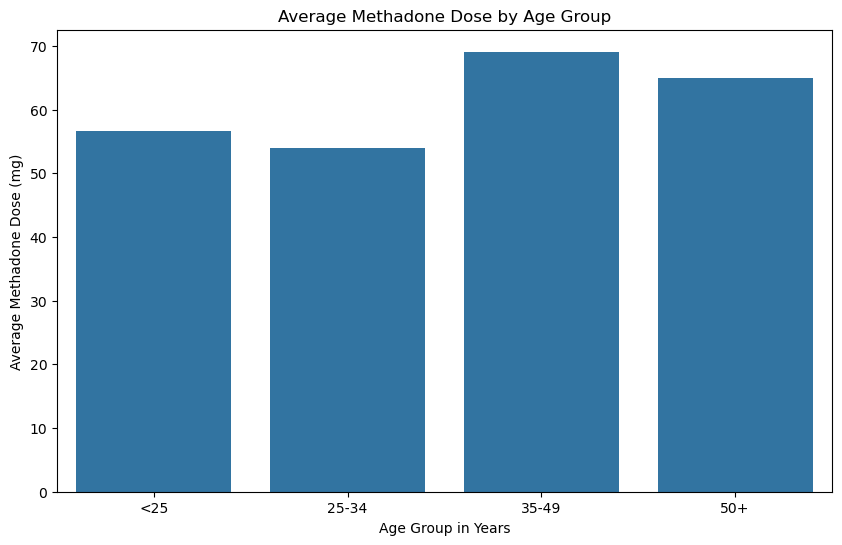

In [24]:
# Group by age group and calculate the average methadone dose
import seaborn as sns
age_group = cleaned_df.groupby('age_group')['methadone_dose_mg'].mean().reset_index()
age_group_order = ['<25', '25-34', '35-49', '50+']

# Create a bar plot for average methadone dose by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='methadone_dose_mg', data=age_group, order=age_group_order)
plt.title('Average Methadone Dose by Age Group')
plt.xlabel('Age Group in Years')
plt.ylabel('Average Methadone Dose (mg)')
plt.show()


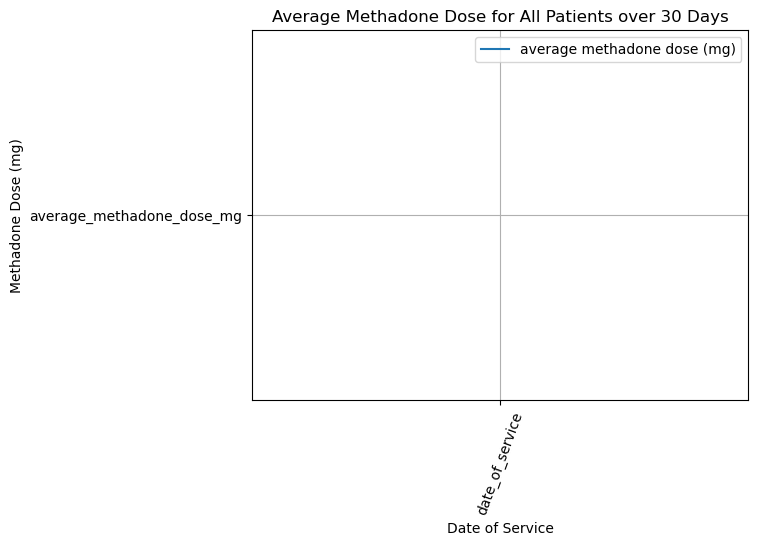

In [25]:
plt.plot(['date_of_service'], ['average_methadone_dose_mg'], label='average methadone dose (mg)')
plt.xlabel('Date of Service')
plt.ylabel('Methadone Dose (mg)')
plt.xticks(rotation=70)
plt.title('Average Methadone Dose for All Patients over 30 Days')
plt.legend()
plt.grid()
plt.show()

In [26]:
#line graph with all patients methadone doses over 30 days in november
#very disorganized, looks messy, limit to maybe 5 patients?

plt.plot(alldoses['date_of_service'], alldoses['methadone_dose_mg'], label='idk')
plt.xlabel('Date of Service')
plt.ylabel('Methadone Dose (mg)')
plt.xticks(rotation=-70)
plt.title('Methadone Dose Over Time')
plt.legend()
plt.grid()
plt.show()

NameError: name 'alldoses' is not defined

In [27]:
#filters dataframe by specific 'word' found within specified column
print(df.shape)
filtered = df.loc[df.race == 'hispanic'] 
print(filtered.shape) 
filtered

(1789, 16)
(582, 16)


,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg_x,total_days_attended_x,dose_category,age_group,retention rate,average_methadone_dose_mg_y,total_days_attended_y
92,5,patient,f,32,hispanic,morphine,6,11/1/2024,55.00,55.00,20,Moderate Dose (50-80mg),25-34,66.67,55.00,20
93,5,patient,f,32,hispanic,morphine,6,11/2/2024,55.00,55.00,20,Moderate Dose (50-80mg),25-34,66.67,55.00,20
94,5,patient,f,32,hispanic,morphine,6,11/3/2024,55.00,55.00,20,Moderate Dose (50-80mg),25-34,66.67,55.00,20
95,5,patient,f,32,hispanic,morphine,6,11/4/2024,55.00,55.00,20,Moderate Dose (50-80mg),25-34,66.67,55.00,20
96,5,patient,f,32,hispanic,morphine,6,11/5/2024,55.00,55.00,20,Moderate Dose (50-80mg),25-34,66.67,55.00,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,99,patient,m,34,hispanic,morphine,1,11/7/2024,30.00,30.00,11,Low Dose (<45mg),25-34,36.67,30.00,11
1474,99,patient,m,34,hispanic,morphine,1,11/8/2024,30.00,30.00,11,Low Dose (<45mg),25-34,36.67,30.00,11
1475,99,patient,m,34,hispanic,morphine,1,11/9/2024,30.00,30.00,11,Low Dose (<45mg),25-34,36.67,30.00,11
1476,99,patient,m,34,hispanic,morphine,1,11/10/2024,30.00,30.00,11,Low Dose (<45mg),25-34,36.67,30.00,11


In [28]:
#line graph showing methadone dose over time for first 3 patients
#set figure size first
plt.figure(figsize=(15, 10))

#plot data
plt.plot(dates, patient1)
plt.plot(dates, patient2)
plt.plot(dates, patient3)

#customize
plt.title("Methadone Doses Over Time")
plt.xlabel('Date of Service')
plt.ylabel('Methadone Dose (mg)')
plt.xticks(rotation=80)
plt.legend(["Patient1", 'Patient2', 'Patient3'])
plt.show()

NameError: name 'dates' is not defined

<Figure size 1500x1000 with 0 Axes>

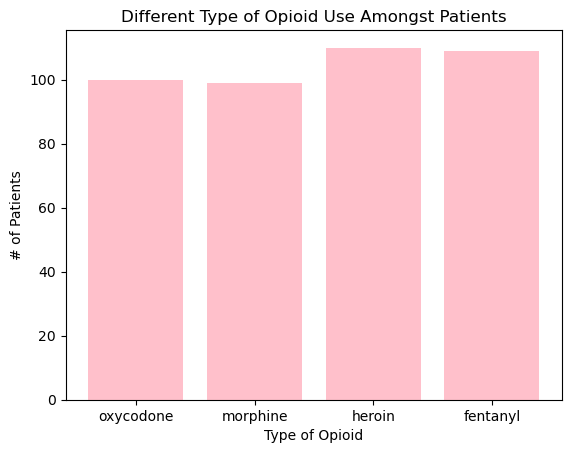

In [29]:
#bar graph comparing different type of previous opioid use 

plt.bar(x = df['previous_opioid_use'],
        height = df['patient_id'],
        color = 'pink')

#customize

plt.title("Different Type of Opioid Use Amongst Patients")
plt.xlabel('Type of Opioid')
plt.ylabel('# of Patients')
plt.show()



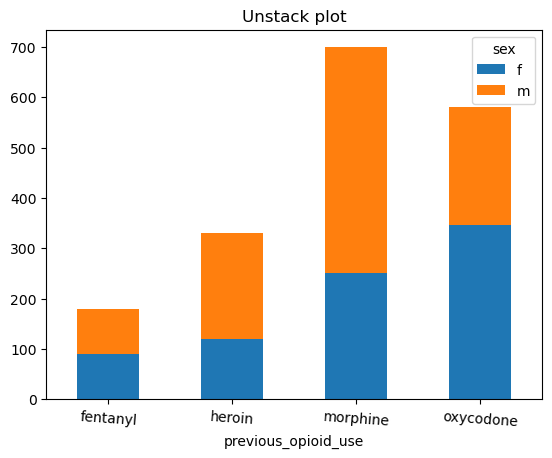

In [78]:
#unstack plot showing different type of opioid use depending on sex
df.groupby(['previous_opioid_use','sex']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Unstack plot' )
plt.xticks(rotation=-4)
plt.show()


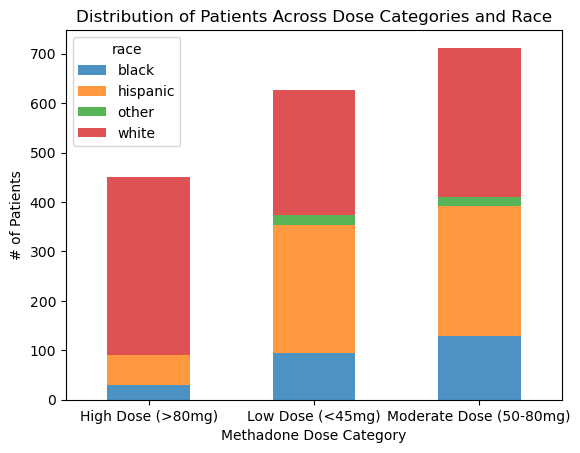

In [30]:
##unstack plot to show the distribution of patients across dose categories and race
dose_race_distribution = pd.crosstab(cleaned_df['dose_category'], cleaned_df['race'])

#plot and customize
dose_race_distribution.plot(kind='bar', stacked=True, alpha=0.8)
plt.title('Distribution of Patients Across Dose Categories and Race')
plt.xlabel('Methadone Dose Category')
plt.ylabel('# of Patients')
plt.xticks(rotation=0)
plt.show()


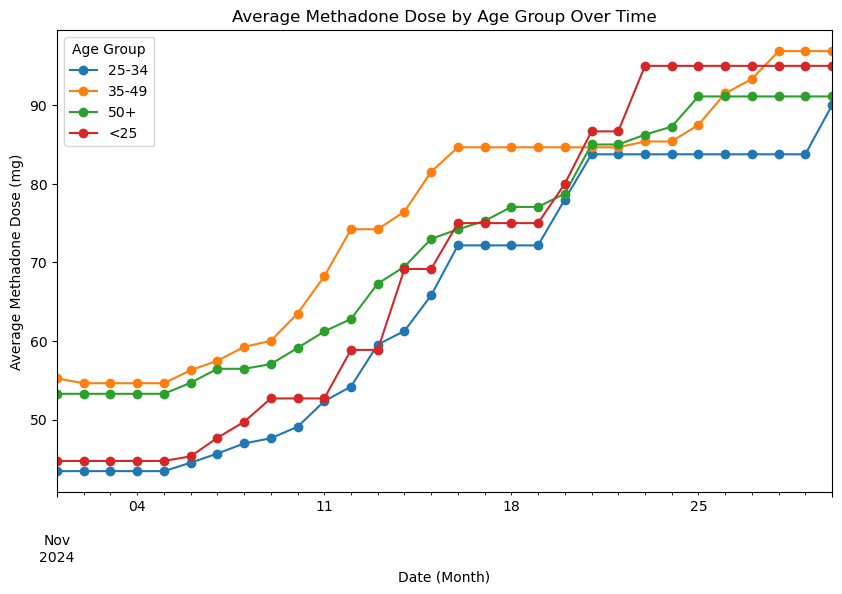

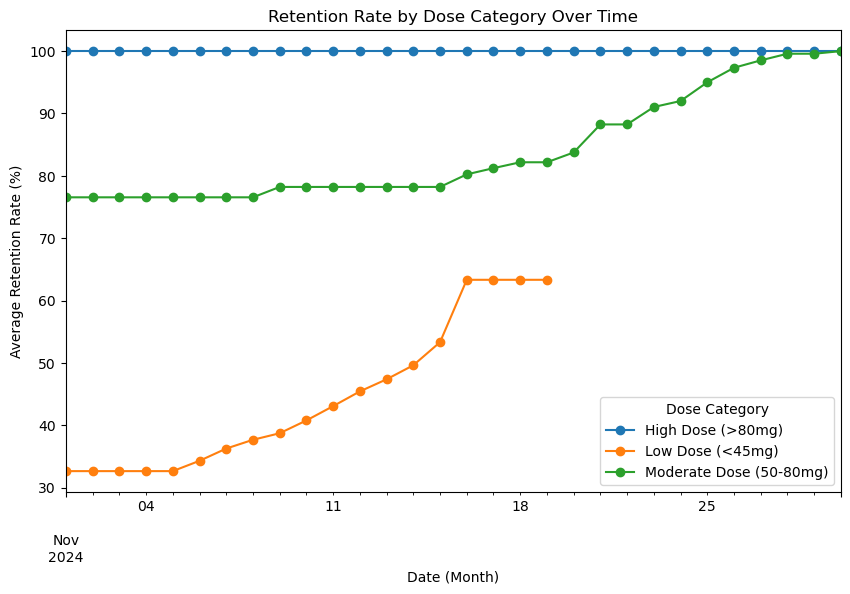

In [31]:
# Convert date_of_service to datetime for time-based analysis
df['date_of_service'] = pd.to_datetime(df['date_of_service'])

# 3. Methadone Dose vs Age Group (Average Over Time)
age_group_dose_over_time = df.groupby([df['date_of_service'], 'age_group'])['methadone_dose_mg'].mean().unstack()

# Plot the line chart for methadone dose over time by age group
age_group_dose_over_time.plot(kind='line', marker='o', figsize=(10, 6), title='Average Methadone Dose by Age Group Over Time')
plt.xlabel('Date (Month)')
plt.ylabel('Average Methadone Dose (mg)')
plt.legend(title='Age Group')
plt.show()

# 4. Retention Rate Across Dose Categories Over Time
dose_category_retention_over_time = df.groupby([df['date_of_service'], 'dose_category'])['retention rate'].mean().unstack()

# Plot the line chart for retention rate over time by dose category
dose_category_retention_over_time.plot(kind='line', marker='o', figsize=(10, 6), title='Retention Rate by Dose Category Over Time')
plt.xlabel('Date (Month)')
plt.ylabel('Average Retention Rate (%)')
plt.legend(title='Dose Category')
plt.show()

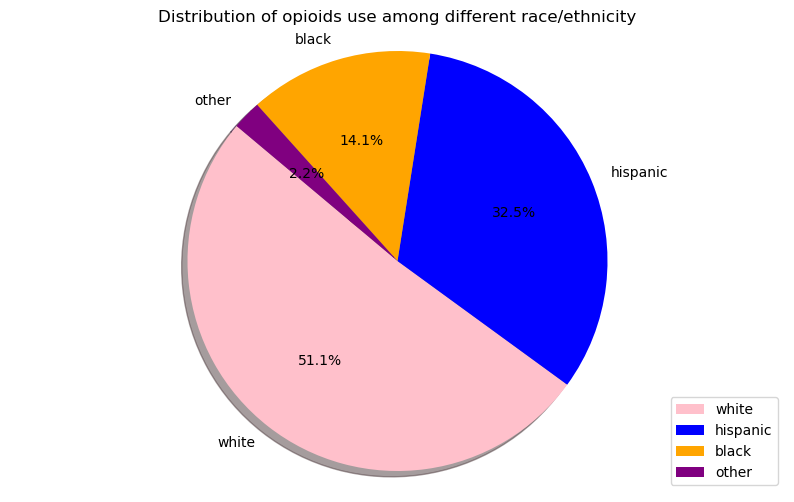

In [102]:
#Group by 'Race' and count the occurrences
race_counts = df['race'].value_counts()

# Define custom colors using real color names
colors = ['pink', 'blue', 'orange', 'purple', 'brown']

# Create a pie chart with custom colors
plt.figure(figsize=(10, 6))
plt.pie(race_counts, labels=race_counts.index, colors=colors[:len(race_counts)], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of opioids use among different race/ethnicity')
plt.legend(race_counts.index, loc="lower right", bbox_to_anchor=(1.0, 0))
plt.show()

In [69]:
grouped = df.groupby("sex").count()
grouped

,patient_id,name,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg_x,total_days_attended_x,dose_category,age_group,retention rate,average_methadone_dose_mg_y,total_days_attended_y
sex,,,,,,,,,,,,,,,
f,806,806,806,806,806,806,806,806,806,806,806,806,806,806,806
m,983,983,983,983,983,983,983,983,983,983,983,983,983,983,983


In [67]:
#grouped= df.groupby("sex").count()
gender_counts = df['sex'].value_counts()

# Print the counts
print(gender_counts)


sex
m    983
f    806
Name: count, dtype: int64


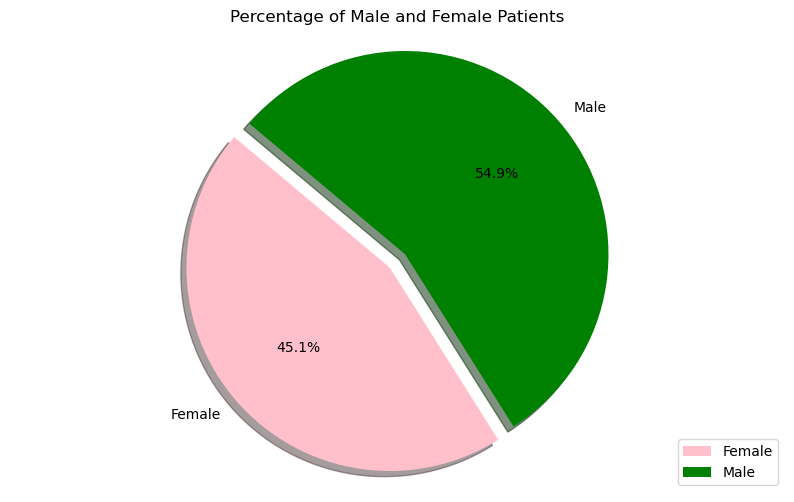

In [103]:
#Pie chart? - % of male/female?

plt.figure(figsize = (10,6))
labels = ['Female','Male']
sizes = [806, 983]
colors = ['Pink', 'Green']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Male and Female Patients')
plt.legend(labels, loc="lower right", bbox_to_anchor=(1.0, 0))
plt.show()

In [41]:
df = pd.read_csv('draft_dataset1.csv')
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg_x,total_days_attended_x,dose_category,age_group,retention rate,average_methadone_dose_mg_y,total_days_attended_y
0,1,patient,f,56,black,oxycodone,6,11/1/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00,24
1,1,patient,f,56,black,oxycodone,6,11/2/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00,24
2,1,patient,f,56,black,oxycodone,6,11/3/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00,24
3,1,patient,f,56,black,oxycodone,6,11/4/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00,24
4,1,patient,f,56,black,oxycodone,6,11/5/2024,75.00,75.00,24,Moderate Dose (50-80mg),50+,80.00,75.00,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11/26/2024,120.00,120.00,30,High Dose (>80mg),35-49,100.00,120.00,30
1785,110,patient,m,46,white,heroin,13,11/27/2024,120.00,120.00,30,High Dose (>80mg),35-49,100.00,120.00,30
1786,110,patient,m,46,white,heroin,13,11/28/2024,120.00,120.00,30,High Dose (>80mg),35-49,100.00,120.00,30
1787,110,patient,m,46,white,heroin,13,11/29/2024,120.00,120.00,30,High Dose (>80mg),35-49,100.00,120.00,30


In [108]:
grouped2 = df.groupby("dose_category").count()
grouped2

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg_x,total_days_attended_x,age_group,retention rate,average_methadone_dose_mg_y,total_days_attended_y
dose_category,,,,,,,,,,,,,,,
High Dose (>80mg),450,450,450,450,450,450,450,450,450,450,450,450,450,450,450
Low Dose (<45mg),627,627,627,627,627,627,627,627,627,627,627,627,627,627,627
Moderate Dose (50-80mg),712,712,712,712,712,712,712,712,712,712,712,712,712,712,712


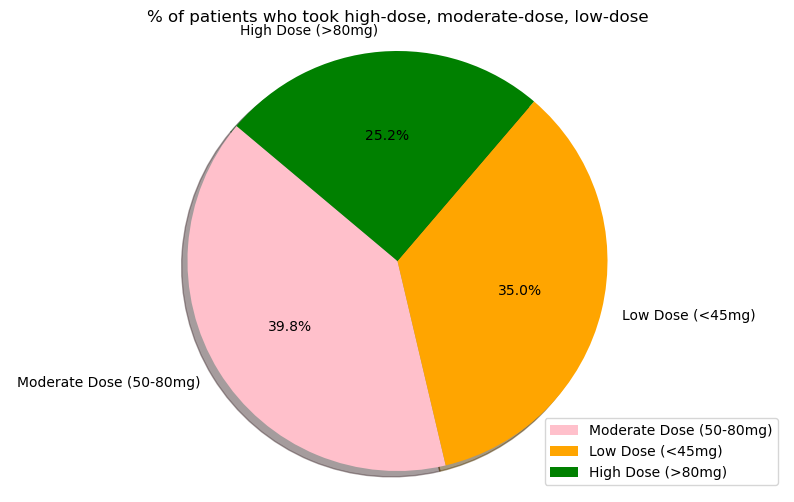

In [111]:
#Pie chart? - % of patients who took high-dose, moderate-dose, low-dose?
dose_counts = df['dose_category'].value_counts()

# Define custom colors
colors = ['pink', 'orange', 'green']

# Create a pie chart with custom colors
plt.figure(figsize=(10, 6))
plt.pie(dose_counts, labels=dose_counts.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of patients who took high-dose, moderate-dose, low-dose')
plt.legend(dose_counts.index, loc="lower right", bbox_to_anchor=(1.0, 0))
plt.show()


In [139]:
# Male/female vs Retention Rate (shows which sex has a higher retention rate?)

grouped3 = df.groupby(["retention rate", 'sex']).count()
grouped3

patient_id  name  age  race  previous_opioid_use  \
retention rate sex                                                     
16.67          f            10    10   10    10                   10   
               m            20    20   20    20                   20   
20.00          f            30    30   30    30                   30   
               m            12    12   12    12                   12   
23.33          f            14    14   14    14                   14   
               m            21    21   21    21                   21   
26.67          f             8     8    8     8                    8   
               m            32    32   32    32                   32   
30.00          f            36    36   36    36                   36   
               m            36    36   36    36                   36   
33.33          f            20    20   20    20                   20   
               m            60    60   60    60                   60   
36.67          f            22    22   22    22                   22   
               m            55    55   55    55                   55   
40.00          f            36    36   36    36                   36   
               m            24    24   24    24                   24   
43.33          f            26    26   26    26                   26   
               m            39    39   39    39                   39   
46.67          m            70    70   70    70                   70   
50.00          f            30    30   30    30                   30   
               m            45    45   45    45                   45   
53.33          m            16    16   16    16                   16   
56.67          m            17    17   17    17                   17   
63.33          f            38    38   38    38                   38   
               m            19    19   19    19                   19   
66.67          f            40    40   40    40                   40   
               m            60    60   60    60                   60   
73.33          f            66    66   66    66                   66   
76.67          m            23    23   23    23                   23   
80.00          f            48    48   48    48                   48   
               m            24    24   24    24                   24   
83.33          m            50    50   50    50                   50   
86.67          f            26    26   26    26                   26   
90.00          f            27    27   27    27                   27   
96.67          f            29    29   29    29                   29   
100.00         f           300   300  300   300                  300   
               m           360   360  360   360                  360   

                    duration_previous_opioid_use  date_of_service  \
retention rate sex                                                  
16.67          f                              10               10   
               m                              20               20   
20.00          f                              30               30   
               m                              12               12   
23.33          f                              14               14   
               m                              21               21   
26.67          f                               8                8   
               m                              32               32   
30.00          f                              36               36   
               m                              36               36   
33.33          f                              20               20   
               m                              60               60   
36.67          f                              22               22   
               m                              55               55   
40.00          f                              36               36   
               m                      

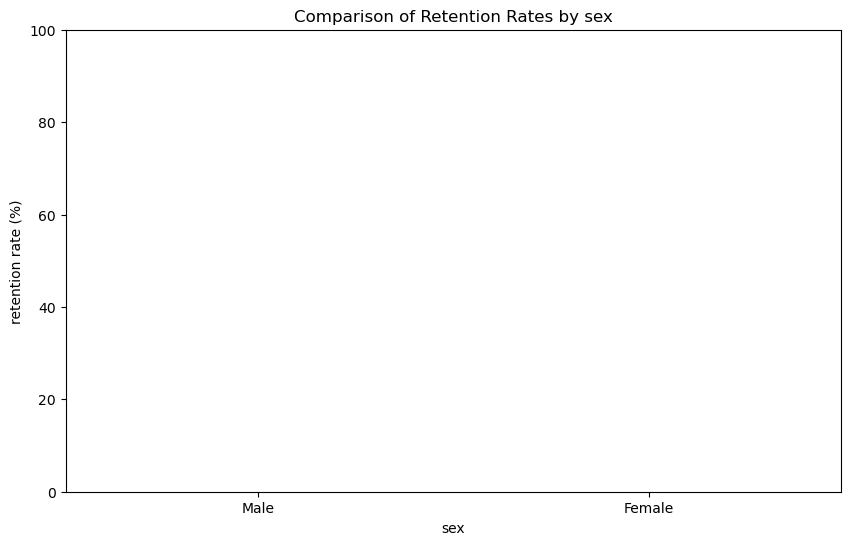

In [155]:
# Create a bar chart

#Retention rate= [16.67,20.00, 23.33,26.67,30.00,33.33,36.67,40.00,43.33,46.67,50.00,53.33,56.37,63.33,66.67,73.33,76.67,80.00,83.33,86.67,90.00,96.67,100.00]

plt.figure(figsize=(10, 6))
plt.bar(labels,retention_rate, color=['blue', 'pink'])
plt.xlabel('sex')
plt.ylabel('retention rate (%)')
plt.title('Comparison of Retention Rates by sex')
plt.ylim(0, 100)
plt.show()